# Scratch Pad
I have written two modules, `equations` and `values` to respectively define the equations used by Bjorck et al, and to provide the experimental conditions and values used for their experimental setups and which can be custom-defined. `first-investigation.ipynb` looked at the equations themselves and developed all of this logically, after which I transferred those equations to the aforementioned modules. This is simply a "scratch pad" to use those modules and test their validity, as well as to calculate things for the future.

In [1]:
import sympy
import values
import equations
import matplotlib.pyplot as plt

from sympy.physics.units import second, pascal, gram, cm, kelvin

In [2]:
def plotMassGain(code):
    times = range(0, 8*60*60, 1000)
    massGain = []
    for time in times:
        massGain.append(values.getMassGain(code, t=time*second)/gram*cm**2)
    plt.plot(times, massGain)
    conditions = values.getExperimentConds(code)
    plt.title("Pressure: " + str(conditions[equations.P_O2]/pascal) + ", Temperature: " + str(conditions[equations.T]/kelvin))
    plt.show()

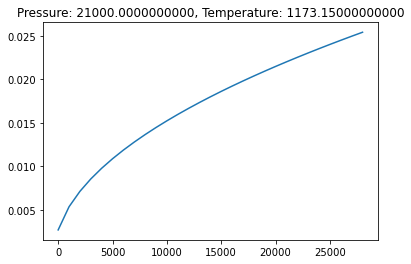

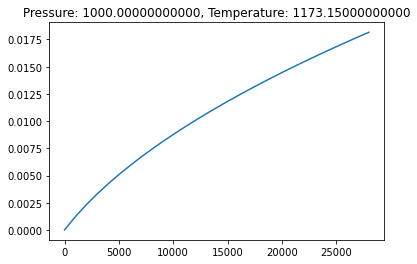

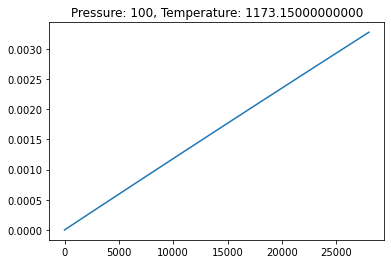

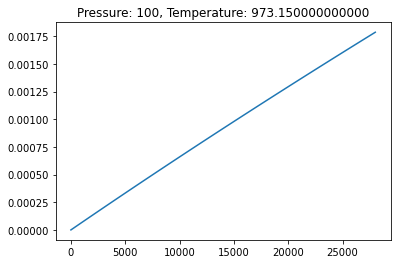

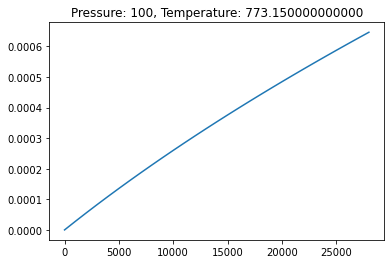

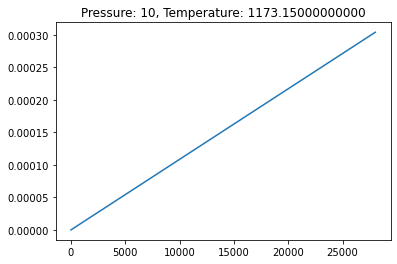

In [3]:
experimentCodes = ["1B", "2B", "3B", "3E", "3D", "4B"]
for code in experimentCodes:
    plotMassGain(code)

In [4]:
values.getMassGain("4B", t=8*60*60*second)

0.000312519143395029*gram/centimeter**2

In [5]:
values.getMassGain("4B", massCalculator=equations.linearMassGain)

0.000312564354864057*gram/centimeter**2

In [6]:
values.getExperimentConds("4B")

{A_1: 634*gram**2/(centimeter**4*second),
 A_2: 0.000867*gram**2/(centimeter**4*second),
 E_1: 248000.0*joule/mole,
 E_2: 103000.0*joule/mole,
 A_l: 1.19e-7*gram/(centimeter**2*second),
 E_l: 27000.0*joule/mole,
 n_l: 1.04,
 n_p: 0,
 F_p: 0.83,
 e: 2.718281828459045,
 R: 8.31446261815324*joule/(kelvin*mole),
 P_{O_2}^{ref,p}: 21000.0*pascal,
 P_{O_2}^{ref,l}: 100*pascal,
 T_ref: 1173.15*kelvin,
 t: 28800*second,
 P_{O_2}: 10*pascal,
 T: 1173.15*kelvin,
 t_0: 0}

## Our experiment
In our experiment, we had 10 minutes of 200 Torr $O_2$ at 500 ppm. Here, I try to calculate the oxide formed in these conditions:

In [9]:
# calculate partial pressure at 500 ppm
from sympy.physics.units import torr, convert_to
O2_pp = 200*torr*500/1e6

In [10]:
values.getMassGain("4B", t=600*second, P_O2=convert_to(O2_pp, pascal), T=1273.15*kelvin)

8.09321822758946e-6*gram/centimeter**2

In [11]:
def getThickness(massGain):
    # assume only Cu2O
    return